In [52]:
import pandas as pd #importing file
import numpy as np
import geopandas 

%matplotlib inline 
import matplotlib.pyplot as plt

playF = pd.read_csv("PFS.csv")


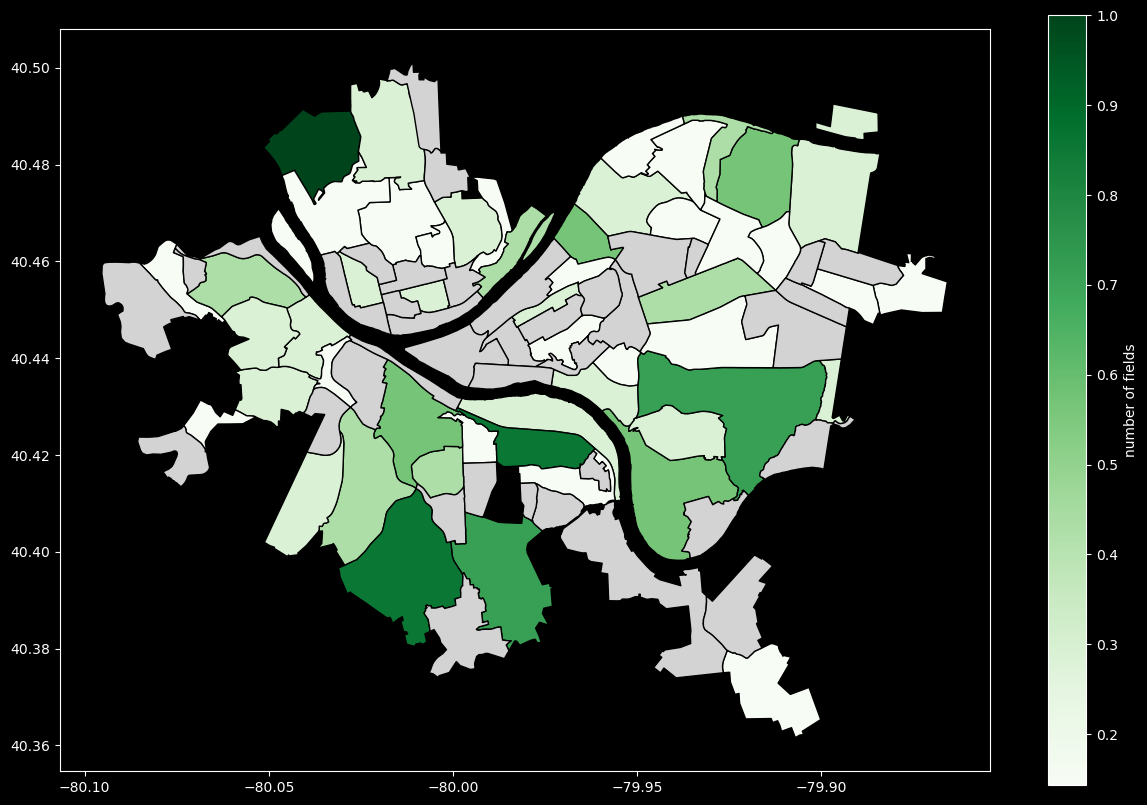

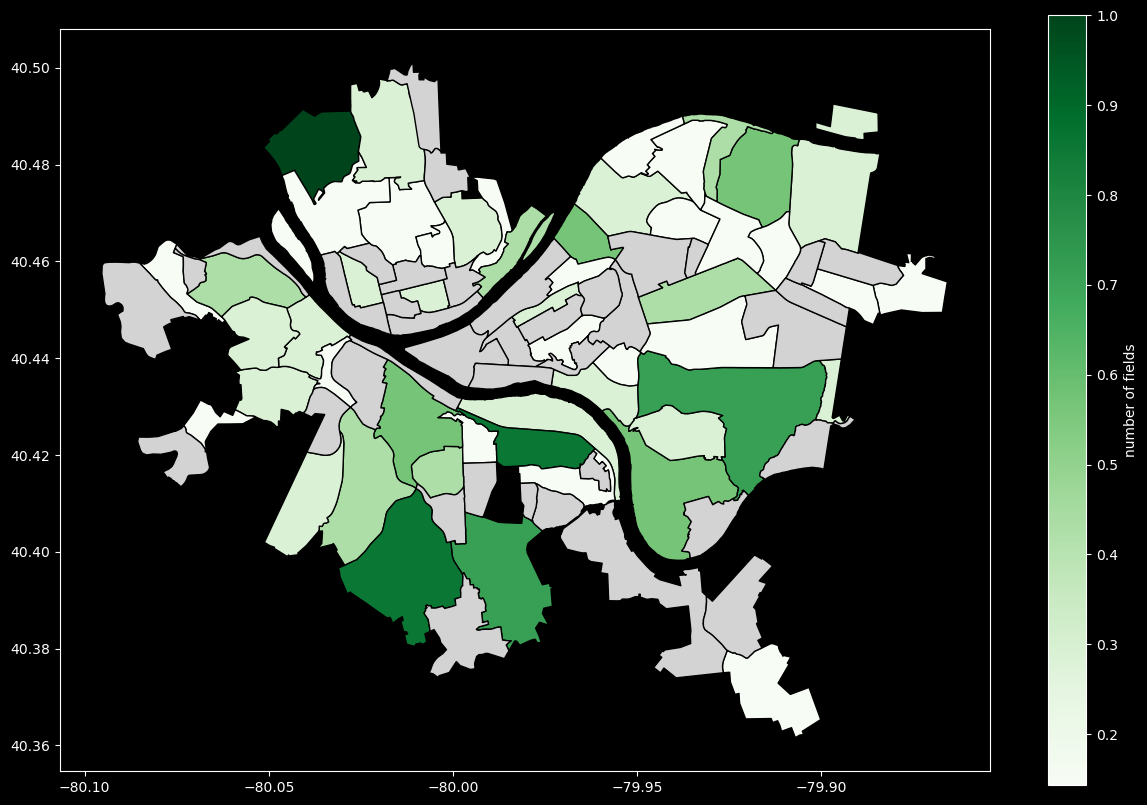

,neighborhood,count
5,Brighton Heights,1.000000
0,South Side Slopes,0.857143
11,Brookline,0.857143
18,Squirrel Hill South,0.714286
43,Carrick,0.714286
2,Lower Lawrenceville,0.571429
13,Mount Washington,0.571429
6,Hazelwood,0.571429
17,Highland Park,0.571429
38,Sheraden,0.428571


In [67]:
quantities = {}
for index, row in playF.iterrows():
    if row['neighborhood'] in quantities: #finding 
        quantities[row['neighborhood']] += 1
    else:
        quantities[row['neighborhood']] = 1

quantities = pd.DataFrame(list(quantities.items()), columns=['neighborhood', 'count']) #counting the neighborhoods
quantities_max = quantities['count'].max()

quantities['count'] = quantities['count'] / quantities_max #calculating the average
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
fields_map = neighborhoods.merge(quantities, how='left', left_on='hood', right_on='neighborhood') #merging the neighborhoods
fields_map.plot(column='count',
               cmap='Greens', 
               edgecolor = "Black",
               legend=True,             
               legend_kwds={'label': "number of fields"}, #changing the color
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
              )
plt.style.use('dark_background')
plt.show()
fields_map.plot(column='count',
               cmap='Greens', 
               edgecolor = "Black",
               legend=True,             
               legend_kwds={'label': "number of fields"}, 
               figsize=(15, 10),        
               missing_kwds={"color": "lightgrey"} 
              )
plt.style.use('dark_background')
plt.show()
quantities.sort_values('count',ascending=False).head(10)